# Machine Learning Assignment - Predicting whether the insurance buyer will claim their travel insurance or not

## 1. Data Loading and Pre-processing

Loading the relevant libraries that I will be starting with:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data stored in Downloads folder

In [2]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [4]:
A = set(data['Destination'].unique())
B = set(test_data['Destination'].unique())
Total_Dest = pd.Series(list(A.union(B)))

In [5]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [6]:
data['Net Sales'].min()

-389.0

### Unique Counts:

In [7]:
print(data['Agency'].value_counts())
print("Length: ", len(data['Agency'].value_counts()))

EPX    26712
CWT     6572
C2B     6280
JZI     4851
SSI      807
JWT      580
RAB      577
LWC      532
TST      389
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: Agency, dtype: int64
Length:  16


In [8]:
data['Agency Type'].value_counts()

Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64

In [9]:
data['Distribution Channel'].value_counts()

Online     47434
Offline      826
Name: Distribution Channel, dtype: int64

In [10]:
print(data['Product Name'].value_counts())
print("Length: ", len(data['Product Name'].value_counts()))

Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Comprehensive Plan                        279
Gold Plan                                 279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Individual Comprehensive Plan              53
Single Trip Travel Protect Platinu

In [11]:
print(data['Destination'].value_counts())
print("Length: ", len(data['Destination'].value_counts()))

SINGAPORE             10068
THAILAND               4509
MALAYSIA               4479
CHINA                  3642
AUSTRALIA              2807
                      ...  
SEYCHELLES                1
LATVIA                    1
ALBANIA                   1
DOMINICAN REPUBLIC        1
GUYANA                    1
Name: Destination, Length: 141, dtype: int64
Length:  141


In [12]:
print(data['Gender'].value_counts())
print("Length: ", len(data['Gender'].value_counts()))

M    7137
F    6762
Name: Gender, dtype: int64
Length:  2


In [13]:
print(data['Claim'].value_counts())
print("Length: ", len(data['Claim'].value_counts()))    ### Prediction Cloumn

0    47552
1      708
Name: Claim, dtype: int64
Length:  2


A quick overview of the data:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


The data seems to have a lot of missing values in the Gender column.

First, let's segregate categorical and numerical columns

In [15]:
cat_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']
num_col = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

### Data Transformation

Beginning with labelling the categorical data in number labels

In [16]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)

In [17]:
df2 = data[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name']]

fit = df2.apply(lambda x: d[x.name].fit_transform(x))

In [18]:
d['Destination'].fit(np.array(Total_Dest))
fit['Destination'] = d['Destination'].transform(data['Destination'])

In [19]:
for column in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']:
    data[column] = fit[column]

In [20]:
# # Encoding the variable
# fit = data.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [21]:
for col in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']:
    print(d[col].classes_)

['ADM' 'ART' 'C2B' 'CBH' 'CCR' 'CSR' 'CWT' 'EPX' 'JWT' 'JZI' 'KML' 'LWC'
 'RAB' 'SSI' 'TST' 'TTW']
['Airlines' 'Travel Agency']
['Offline' 'Online']
['1 way Comprehensive Plan' '2 way Comprehensive Plan' '24 Protect'
 'Annual Gold Plan' 'Annual Silver Plan' 'Annual Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Annual Travel Protect Silver'
 'Basic Plan' 'Bronze Plan' 'Cancellation Plan' 'Child Comprehensive Plan'
 'Comprehensive Plan' 'Gold Plan' 'Individual Comprehensive Plan'
 'Premier Plan' 'Rental Vehicle Excess Insurance' 'Silver Plan'
 'Single Trip Travel Protect Gold' 'Single Trip Travel Protect Platinum'
 'Single Trip Travel Protect Silver'
 'Spouse or Parents Comprehensive Plan' 'Ticket Protector'
 'Travel Cruise Protect' 'Travel Cruise Protect Family' 'Value Plan']
['ALBANIA' 'ANGOLA' 'ARGENTINA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA'
 'AZERBAIJAN' 'BAHRAIN' 'BANGLADESH' 'BARBADOS' 'BELARUS' 'BELGIUM'
 'BENIN' 'BERMUDA' 'BHUTAN' 'BOLIVIA' 'BOSNIA AND HERZEGOVINA' 'BOTSWANA

In [22]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,139,19.8,11.88,NaN,29,0
1,7,1,1,10,93,93,63.0,0.00,NaN,36,0
2,7,1,1,1,22,140,22.0,0.00,NaN,25,0
3,2,0,1,17,14,118,54.5,13.63,M,24,0
4,7,1,1,10,90,145,10.0,0.00,NaN,23,0


In [23]:
data['Gender'].value_counts()

M    7137
F    6762
Name: Gender, dtype: int64

Encoding the 'Gender' column separately as it has missing values

In [24]:
def GenderMap(y):
    if y=='M':
        return np.int(1)
    elif y=='F':
        return np.int(0)
    else: return y

data['Gender'] = list(map(lambda x: GenderMap(x), data['Gender']))
data['Gender']

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
48255    NaN
48256    0.0
48257    NaN
48258    NaN
48259    NaN
Name: Gender, Length: 48260, dtype: float64

In [25]:
data['Gender'].value_counts()

1.0    7137
0.0    6762
Name: Gender, dtype: int64

In [26]:
data[data['Gender']==0.0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
22,9,0,1,8,49,63,26.0,9.10,0.0,38,0
28,2,0,1,4,382,118,193.2,48.30,0.0,76,0
35,12,0,1,25,5,19,15.0,6.00,0.0,28,0
40,9,0,1,8,9,129,18.0,6.30,0.0,48,0
46,2,0,1,9,22,118,23.5,5.88,0.0,31,0
...,...,...,...,...,...,...,...,...,...,...,...
48245,8,0,1,25,75,56,124.0,49.60,0.0,118,0
48246,2,0,1,17,12,118,42.0,10.50,0.0,23,0
48247,9,0,1,8,9,79,18.0,6.30,0.0,45,0
48248,2,0,1,17,15,118,29.0,7.25,0.0,75,0


### Dealing with missing values:

Checking the no. of missing values in each column:

In [27]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

#### Imputation:

In [28]:
imp_data = data.iloc[:,:-1]

In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# df = pd.DataFrame({'A':['a','b','a',np.nan,'a','b','c'] , 'B':[1,2,3,4,6,7,9] , 'C':['q','e',np.nan,'w','w','e','q']})  


def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    #Minmaxscaler and KNN imputation 
    mm = MinMaxScaler()
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in cols : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df, mm, knn_imputer


#Imputation
D, mm, knn_imputer = imputation(imp_data,['Gender'])
data['Gender'] = D['Gender']

In [30]:
data['Gender'].value_counts()  ## 0.0  = "F"  (0: 24598  ;    1: 23662)
                               ## 1.0  = "M"

1.0    27566
0.0    20694
Name: Gender, dtype: int64

In [31]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,139,19.8,11.88,1.0,29,0
1,7,1,1,10,93,93,63.0,0.00,1.0,36,0
2,7,1,1,1,22,140,22.0,0.00,1.0,25,0
3,2,0,1,17,14,118,54.5,13.63,1.0,24,0
4,7,1,1,10,90,145,10.0,0.00,1.0,23,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  int32  
 1   Agency Type           48260 non-null  int32  
 2   Distribution Channel  48260 non-null  int32  
 3   Product Name          48260 non-null  int32  
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  int32  
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                48260 non-null  float64
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 3.1 MB


In [33]:
data.describe().loc[['min', 'max'], :]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
min,0.0,0.0,0.0,0.0,-2.0,0.0,-389.0,0.00,0.0,0.0,0.0
max,15.0,1.0,1.0,25.0,4881.0,148.0,666.0,262.76,1.0,118.0,1.0


The data is now imputed with appropriate values instead of np.nan

### Dealing with Outliers:

Plotting boxplot for checking outliers for the numeric columns mentioned before:

In [34]:
len(num_col)

4

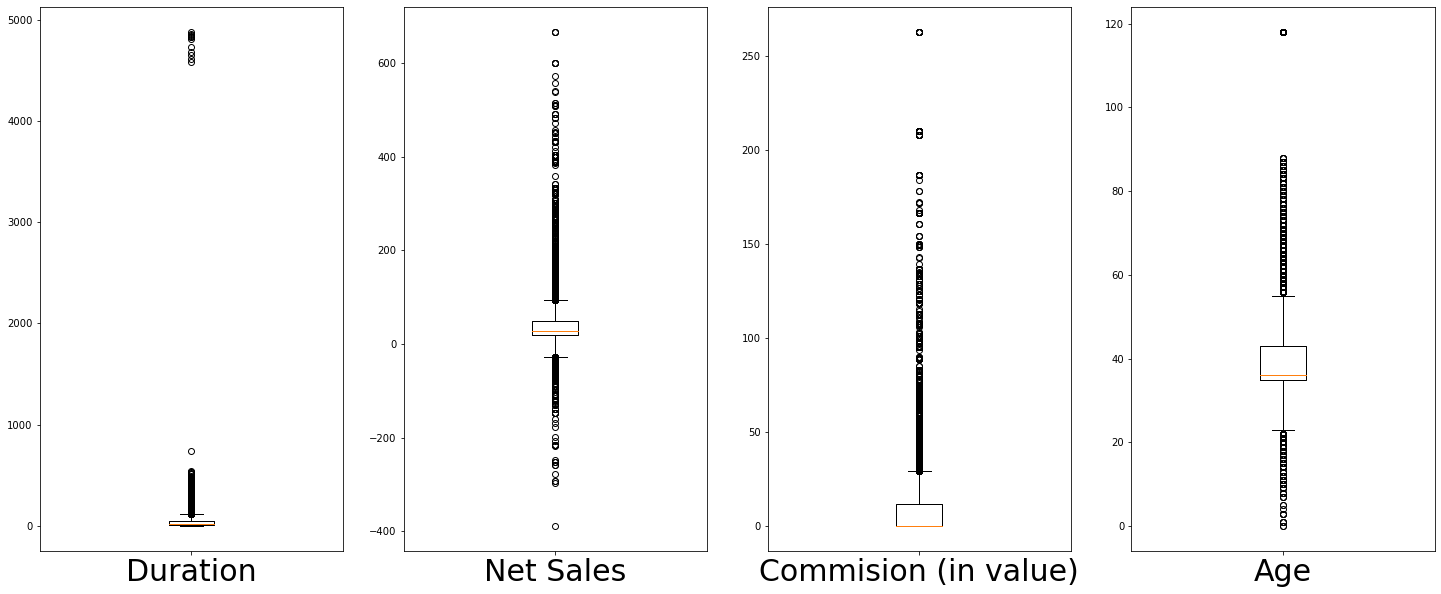

In [35]:
plt.figure(figsize=(25,10))
for i, col in zip(range(1,len(num_col)+1), num_col):
    plt.subplot(1, len(num_col), i)
    plt.boxplot(data[col], labels=[col])
    plt.xticks(size=30)

All four columns have many outliers on both sides of the box plot

Defining a function to get the index of outliers for a given column:

In [36]:
def outliers_index(X):
    
    q = np.percentile(X, [0, 25, 50, 75, 100])
    iqr = q[3] - q[1]
    
    lw = q[1] - (1.5 * iqr)
    uw = q[3] + (1.5 * iqr)
    
    indx = np.where( (X<lw) | (X>uw) )
    #X = np.delete(X, indx)
    
    return indx

Getting the list of outlier rows for all three columns:

In [37]:
all_index = []
for col in num_col:
    all_index.append(outliers_index(data[col]))
all_index

[(array([   20,    28,    36, ..., 48220, 48228, 48240], dtype=int64),),
 (array([   12,    20,    28, ..., 48240, 48245, 48253], dtype=int64),),
 (array([   20,    28,    30, ..., 48240, 48245, 48253], dtype=int64),),
 (array([   10,    12,    28, ..., 48245, 48248, 48258], dtype=int64),)]

In [38]:
for i in range(len(num_col)):
    print("Number of outliers in Column -", num_col[i], ":", len(all_index[i][0]))

Number of outliers in Column - Duration : 4240
Number of outliers in Column - Net Sales : 4219
Number of outliers in Column - Commision (in value) : 5358
Number of outliers in Column - Age : 5629


Taking the union of all these outlier rows, so that we know which rows to exclude and their count:

In [39]:
Outlier_rows_array = np.union1d(np.union1d(np.union1d(all_index[0], all_index[1]), all_index[2]), all_index[3])
print("Outlier rows:", len(Outlier_rows_array))
Outlier_rows_array

Outlier rows: 13502


array([   10,    12,    20, ..., 48248, 48253, 48258], dtype=int64)

So there are 13,502 rows which have at least 1 outlier in any of the four numeric columns.

To remove the Outlier Rows from the dataframe:

In [40]:
data.drop(index=Outlier_rows_array, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34758 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                34758 non-null  int32  
 1   Agency Type           34758 non-null  int32  
 2   Distribution Channel  34758 non-null  int32  
 3   Product Name          34758 non-null  int32  
 4   Duration              34758 non-null  int64  
 5   Destination           34758 non-null  int32  
 6   Net Sales             34758 non-null  float64
 7   Commision (in value)  34758 non-null  float64
 8   Gender                34758 non-null  float64
 9   Age                   34758 non-null  int64  
 10  Claim                 34758 non-null  int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 2.5 MB


And, we are left with exactly 34,758 rows

In [42]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,139,19.8,11.88,1.0,29,0
1,7,1,1,10,93,93,63.0,0.00,1.0,36,0
2,7,1,1,1,22,140,22.0,0.00,1.0,25,0
3,2,0,1,17,14,118,54.5,13.63,1.0,24,0
4,7,1,1,10,90,145,10.0,0.00,1.0,23,0


In [43]:
## Converting all columns to int type (except float64 columns)

for col in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Gender', 'Age', 'Claim']:
    data[col] = data[col].astype(int)

In [44]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,139,19.8,11.88,1,29,0
1,7,1,1,10,93,93,63.0,0.00,1,36,0
2,7,1,1,1,22,140,22.0,0.00,1,25,0
3,2,0,1,17,14,118,54.5,13.63,1,24,0
4,7,1,1,10,90,145,10.0,0.00,1,23,0


The categorical data is label encoded. 

In [45]:
data.Gender.value_counts()

1    18775
0    15983
Name: Gender, dtype: int64

### Normalize the data

For normalisation, I am going to use MinMaxScaler as it returns the dataframe with values scaled between 0 to 1

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [47]:
ls = list(data['Net Sales']) + list(test_data['Net Sales'])
ls = np.array(ls)
ls

array([19.8, 63. , 22. , ..., 31. ,  0. ,  0. ])

In [48]:
data.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000
mean,6.778094,0.752604,0.992146,8.504344,27.664566,85.565827,28.706983,3.767047,0.540163,36.801974,0.010587
std,2.193107,0.431505,0.088277,6.186988,26.282060,40.479507,19.043263,6.365318,0.498391,6.506434,0.102351
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,0.000000,0.000000,23.000000,0.000000
25%,7.000000,1.000000,1.000000,1.000000,8.000000,56.000000,17.000000,0.000000,0.000000,35.000000,0.000000
50%,7.000000,1.000000,1.000000,10.000000,18.000000,88.000000,22.500000,0.000000,1.000000,36.000000,0.000000
75%,7.000000,1.000000,1.000000,10.000000,39.000000,118.000000,37.000000,6.300000,1.000000,37.000000,0.000000
max,14.000000,1.000000,1.000000,25.000000,119.000000,148.000000,93.000000,29.050000,1.000000,55.000000,1.000000


In [49]:
data_arr = sc.fit_transform(data.iloc[:,:-1])

In [50]:
normalised_data = pd.DataFrame(data_arr, columns=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age'])
normalised_data['Claim'] = data['Claim']

In [51]:
normalised_data.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,34758.000000,25016.000000
mean,0.444469,0.752604,0.992146,0.340174,0.232475,0.578147,0.464225,0.129675,0.540163,0.431312,0.010273
std,0.168701,0.431505,0.088277,0.247480,0.220858,0.273510,0.158694,0.219116,0.498391,0.203326,0.100838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,1.000000,1.000000,0.040000,0.067227,0.378378,0.366667,0.000000,0.000000,0.375000,0.000000
50%,0.461538,1.000000,1.000000,0.400000,0.151261,0.594595,0.412500,0.000000,1.000000,0.406250,0.000000
75%,0.461538,1.000000,1.000000,0.400000,0.327731,0.797297,0.533333,0.216867,1.000000,0.437500,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function displays the basic statistics of the dataframe. 

##### The above last column tells us that 1.06% of the target values are 'Yes'. This means that, the data is imbalanced data

### Balancing the dataset (by method of Upsampling):

In [52]:
normalised_data.Claim.value_counts()

0.0    24759
1.0      257
Name: Claim, dtype: int64

### Note that: 
#### 1  =  'Yes'
#### 0  =  'No'

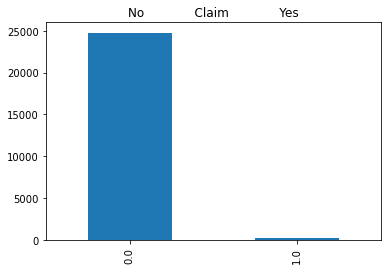

In [53]:
normalised_data.Claim.value_counts().plot(kind='bar', title='No             Claim             Yes')

In [54]:
normalised_data_Yes = normalised_data[normalised_data.Claim==1]  ## Taking only those rows having Yes as Claim
normalised_data_No = normalised_data[normalised_data.Claim==0]   ## Taking only those rows having No as Claim

In [55]:
normalised_data_Yes_upsampled = normalised_data_Yes.sample(34390, replace=True, random_state=1) ## Upsampling

In [56]:
normalised_data_upsampled = pd.concat([normalised_data_Yes_upsampled, normalised_data_No], axis=0) ## Concatenating upsampled Yes rows with the original No rows

In [57]:
normalised_data_upsampled.Claim.value_counts()  ## Expected value counts to be equal after upsampling

1.0    34390
0.0    24759
Name: Claim, dtype: int64

In [58]:
print("Before resampling: \n", normalised_data['Claim'].value_counts())
print("\n\nAfter resampling: \n", normalised_data_upsampled['Claim'].value_counts())

Before resampling: 
 0.0    24759
1.0      257
Name: Claim, dtype: int64


After resampling: 
 1.0    34390
0.0    24759
Name: Claim, dtype: int64


<b>Thus, I have balanced the data by upsampling the rows with 'Yes' as Claim.</b>

The new value counts of Claim are 34390 and 34390 for both 'Yes' and 'No'

In [59]:
normalised_data = normalised_data_upsampled  ## Overwriting the upsampled data to the original data object

#### Splitting the Data into train and test:

In [60]:
X = normalised_data.iloc[:, :-1]
Y = normalised_data.iloc[:, -1]

In [61]:
X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
5133,0.461538,1.0,1.0,0.40,0.100840,0.378378,0.366667,0.000000,1.0,0.40625
31383,0.461538,1.0,1.0,0.40,0.243697,0.358108,0.483333,0.000000,1.0,0.15625
11272,0.923077,0.0,1.0,0.88,0.470588,0.797297,0.234417,0.011015,1.0,0.78125
34248,0.461538,1.0,1.0,0.40,0.058824,0.945946,0.700000,0.000000,1.0,0.84375
27362,0.461538,1.0,1.0,0.40,0.092437,0.459459,0.733333,0.000000,1.0,0.40625
...,...,...,...,...,...,...,...,...,...,...
34751,0.384615,1.0,1.0,0.64,0.050420,0.385135,0.555000,0.817900,1.0,0.93750
34752,0.461538,1.0,1.0,0.40,0.815126,0.689189,0.325000,0.000000,0.0,0.40625
34753,0.461538,1.0,1.0,0.04,0.058824,0.175676,0.466667,0.000000,0.0,0.40625
34755,0.076923,0.0,1.0,0.36,0.168067,0.797297,0.725000,0.516351,0.0,0.21875


In [62]:
Y

5133     1.0
31383    1.0
11272    1.0
34248    1.0
27362    1.0
        ... 
34751    0.0
34752    0.0
34753    0.0
34755    0.0
34756    0.0
Name: Claim, Length: 59149, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=.25, stratify=Y)

In [65]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (44361, 10)
X_test shape:  (14788, 10)
Y_train shape:  (44361,)
Y_test shape:  (14788,)


I have divided the data into 75% training data and 25% test data

In [66]:
X_train

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
32634,0.461538,1.0,1.0,0.00,0.126050,0.695946,0.675000,0.000000,0.0,0.40625
13076,0.076923,0.0,1.0,0.36,0.033613,0.797297,0.337500,0.116351,1.0,0.90625
31162,0.461538,1.0,1.0,0.04,0.310924,0.358108,0.708333,0.000000,0.0,0.37500
27355,0.461538,1.0,1.0,0.00,0.243697,0.358108,0.391667,0.000000,0.0,0.37500
19635,0.461538,1.0,1.0,0.04,0.361345,0.425676,0.816667,0.000000,0.0,0.40625
...,...,...,...,...,...,...,...,...,...,...
3175,0.461538,1.0,1.0,0.40,0.420168,0.945946,0.708333,0.000000,1.0,0.31250
8381,0.461538,1.0,1.0,0.04,0.109244,0.358108,0.400000,0.000000,0.0,0.40625
28116,0.461538,1.0,1.0,0.40,0.109244,0.533784,0.308333,0.000000,1.0,0.75000
25622,0.461538,1.0,1.0,0.00,0.075630,0.797297,0.516667,0.000000,0.0,0.40625


In [67]:
X_test

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
17767,0.461538,1.0,1.0,0.00,0.176471,0.945946,0.775000,0.000000,1.0,0.40625
18421,0.076923,0.0,1.0,0.68,0.058824,0.797297,0.379167,0.159380,0.0,0.65625
33887,0.384615,1.0,1.0,0.64,0.176471,0.412162,0.307500,0.204475,1.0,0.50000
28238,0.461538,1.0,1.0,0.04,0.025210,0.533784,0.725000,0.000000,0.0,0.40625
10028,0.461538,1.0,1.0,0.40,0.050420,0.358108,0.383333,0.000000,1.0,0.40625
...,...,...,...,...,...,...,...,...,...,...
11910,0.615385,0.0,1.0,0.32,0.672269,0.175676,0.591667,0.530120,0.0,0.75000
21225,0.076923,0.0,1.0,0.36,0.302521,0.797297,0.812500,0.606885,0.0,0.84375
18777,0.615385,0.0,1.0,0.32,0.176471,0.689189,0.575000,0.506024,0.0,0.37500
19283,0.076923,0.0,1.0,0.68,0.033613,0.797297,0.456250,0.238898,0.0,0.34375


In [68]:
Y_train

32634    0.0
13076    0.0
31162    1.0
27355    0.0
19635    0.0
        ... 
3175     1.0
8381     1.0
28116    0.0
25622    1.0
30356    1.0
Name: Claim, Length: 44361, dtype: float64

In [69]:
Y_test

17767    1.0
18421    0.0
33887    0.0
28238    1.0
10028    0.0
        ... 
11910    0.0
21225    0.0
18777    0.0
19283    1.0
31777    1.0
Name: Claim, Length: 14788, dtype: float64

## 2. Model Building, Evaluation and Selection 

First, I will write a single function to avoid repeating the same code for every model and evaluation calculations

In [70]:
from sklearn.metrics import confusion_matrix   ## For Model Evaluation
import seaborn as sns   ## For plotting the Confusion-Matrix

In [71]:
def model_builder_and_evaluator(model, X_train, Y_train, X_test, Y_test):
    
    # Model Building Section
    clf = model
    clf.fit(X_train,Y_train)   ## Fitting the model
    clf_predictions=clf.predict(X_test)  ## Making predictions on the Y_test data using parameters learned from the previous line
    print("Prediction for "+str(model)+" : \n",clf_predictions)
    print("\n\nAccuracy for training data = ", clf.score(X_train, Y_train))
    print("Accuracy for test data = ", clf.score(X_test, Y_test))
    
    # Confusion-Matrix
    conf_mat = confusion_matrix(y_true=Y_test, y_pred=clf_predictions)  ## Creating Confusion Matrix
    # print(conf_mat)
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, ax = ax); ## Displaying Confusion Matrix using seaborn library
    
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO', 'YES'])
    ax.yaxis.set_ticklabels(['NO', 'YES'])
    
    # Evaluation metrics:
    TP = conf_mat[0][0]  ## Labelling the elements of the confusion matrix
    FN = conf_mat[0][1]
    FP = conf_mat[1][0]
    TN = conf_mat[1][1]

    Accuracy = (TP + TN)/(TP+FN+FP+TN)     ## Defining Evaluation Metrics that are based on the elements of confusion matrix
    Sensitivity = TP/(TP + FN)
    Specificity = TN/(FP + TN)
    Precision = TP/(TP + FP)
    Recall = TP/(TP + FN)
    F_Score = (2*Precision*Recall)/(Precision + Recall)
    
    print("\nOther Metrics:")
    print("\nSensitivity : ", Sensitivity)
    print("Specificity : ", Specificity)
    print("Precision : ", Precision)
    print("Recall : ", Recall)
    print("F-score : ", F_Score)
    
    return clf

### A. Decision Trees Classifier:

In [72]:
## Loading the necessary libraries for Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [73]:
DTC = DecisionTreeClassifier(random_state=0)

In [74]:
#model_builder_and_evaluator(DTC, X_train, Y_train, X_test, Y_test)

### B. Naive Bayes Classifier:

In [75]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()

In [76]:
#model_builder_and_evaluator(NBC, X_train, Y_train, X_test, Y_test)

### C. Logistic Regression Classifier:

In [77]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [78]:
#model_builder_and_evaluator(LR, X_train, Y_train, X_test, Y_test)

### D. K Neighbours Classifier:

In [79]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=3)

In [80]:
#model_builder_and_evaluator(KNC, X_train, Y_train, X_test, Y_test)

### E. Random Forest Classifier:

In [81]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=1)

Prediction for RandomForestClassifier(random_state=1) : 
 [1. 0. 0. ... 0. 1. 1.]


Accuracy for training data =  0.9981064448502063
Accuracy for test data =  0.9970246145523397

Other Metrics:

Sensitivity :  0.992891760904685
Specificity :  1.0
Precision :  1.0
Recall :  0.992891760904685
F-score :  0.9964332036316472


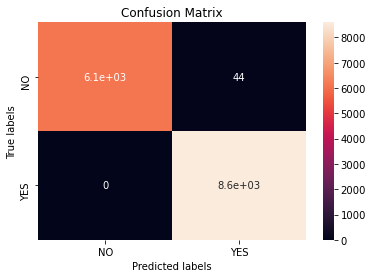

In [82]:
clf = model_builder_and_evaluator(RFC, X_train, Y_train, X_test, Y_test)

### F. Support Vector Classifier:

In [83]:
from sklearn.svm import SVC
svclassifier = SVC(random_state=1)

In [84]:
# model_builder_and_evaluator(svclassifier, X_train, Y_train, X_test, Y_test)

## Selection:

On comparing the confusion matrix and their corresponding metrics of all 6 classifiers, it is clear that the <b>Random Forest Classifier</b> has performed better than any of the other classifiers. This is because, Random Forest is an ensemble technique which trains different decision trees and makes use of them to output the improved accuracy which is higher than the individual trees. 

<b>In this dataset, Random Forest is showing F1-score for test data =  F-score :   0.9981356327196457 = 99.81%</b> . Also the other metrics like Precision, Recall, Sensitivity, Specificity and Accuracy are all above 99.5% which are best among the 6.

## Predictions on Test Data:

In [85]:
test_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.00,0.00,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.00,0.00,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.00,0.00,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.00,0.00,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.00,0.00,NaN,33
...,...,...,...,...,...,...,...,...,...,...
15827,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,MALAYSIA,25.00,0.00,NaN,43
15828,C2B,Airlines,Online,Annual Silver Plan,409,SINGAPORE,252.85,63.21,F,20
15829,JWT,Airlines,Online,Value Plan,54,INDIA,31.00,12.40,F,118
15830,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,30,UNITED ARAB EMIRATES,0.00,11.88,NaN,31


In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                4546 non-null   object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


# Do data transformation, imputations, normalization, prediction for test_data

In [87]:
# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [88]:
df3 = test_data[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']]

df3 = df3.apply(lambda x: d[x.name].transform(x))

for column in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']:
    test_data[column] = df3[column]

In [89]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,7,1,1,10,24,53,27.0,0.0,NaN,36
1,7,1,1,10,51,63,45.0,0.0,NaN,36
2,7,1,1,10,52,63,21.0,0.0,NaN,21
3,7,1,1,10,89,118,11.0,0.0,NaN,30
4,7,1,1,10,5,79,10.0,0.0,NaN,33


In [90]:
def GenderMap(y):
    if y=='M':
        return np.int(1)
    elif y=='F':
        return np.int(0)
    else: return y

test_data['Gender'] = list(map(lambda x: GenderMap(x), test_data['Gender']))
test_data['Gender']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15827    NaN
15828    0.0
15829    0.0
15830    NaN
15831    NaN
Name: Gender, Length: 15832, dtype: float64

In [91]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,7,1,1,10,24,53,27.0,0.0,NaN,36
1,7,1,1,10,51,63,45.0,0.0,NaN,36
2,7,1,1,10,52,63,21.0,0.0,NaN,21
3,7,1,1,10,89,118,11.0,0.0,NaN,30
4,7,1,1,10,5,79,10.0,0.0,NaN,33


In [92]:
test_data.Gender.value_counts()

1.0    2330
0.0    2216
Name: Gender, dtype: int64

In [93]:
# import numpy as np
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import MinMaxScaler

# # df = pd.DataFrame({'A':['a','b','a',np.nan,'a','b','c'] , 'B':[1,2,3,4,6,7,9] , 'C':['q','e',np.nan,'w','w','e','q']})  


# def find_category_mappings(df, variable):
#     return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

# def integer_encode(df , variable, ordinal_mapping):
#     df[variable] = df[variable].map(ordinal_mapping)

# mappin = dict()
# def imputation(df1 , cols):
#     df = df1.copy()
#     #Encoding dict &amp; Removing nan    
#     #mappin = dict()
#     for variable in cols:
#         mappings = find_category_mappings(df, variable)
#         mappin[variable] = mappings

#     #Apply mapping
#     for variable in cols:
#         integer_encode(df, variable, mappin[variable])  

#     #Minmaxscaler and KNN imputation 
#     mm = MinMaxScaler()
#     sca = mm.fit_transform(df)
#     knn_imputer = KNNImputer()
#     knn = knn_imputer.fit_transform(sca)
#     df.iloc[:,:] = mm.inverse_transform(knn)
#     for i in cols : 
#         df[i] = round(df[i]).astype('int')

#     #Inverse transform
#     for i in cols:
#         inv_map = {v: k for k, v in mappin[i].items()}
#         df[i] = df[i].map(inv_map)
#     return df, mm, knn_imputer


# #Imputation
# D, mm, knn_imputer = imputation(imp_data,['Gender'])
# data['Gender'] = D['Gender']

In [94]:
def imputation_transform(df1 , cols, mm, knn_imputer, mappin):
    df = df1.copy()
    #Apply mapping
    for variable in cols:
        #integer_encode(df, variable, mappin[variable])
        df[variable] = df[variable].map(mappin[variable])

    #Minmaxscaler and KNN imputation 
    sca = mm.transform(df)
    knn = knn_imputer.transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in cols : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df


#Imputation
test_data = imputation_transform(test_data,['Gender'], mm, knn_imputer, mappin)
test_data.Gender = test_data.Gender.astype(int)

In [95]:
## Converting all columns to int type (except float64 columns)

for col in ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Gender', 'Age']:
    test_data[col] = test_data[col].astype(int)

In [96]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,7,1,1,10,24,53,27.0,0.0,1,36
1,7,1,1,10,51,63,45.0,0.0,1,36
2,7,1,1,10,52,63,21.0,0.0,1,21
3,7,1,1,10,89,118,11.0,0.0,0,30
4,7,1,1,10,5,79,10.0,0.0,1,33


In [97]:
test_data.describe().loc[['min','max'],:]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
min,0.0,0.0,0.0,0.0,-1.0,2.0,-357.5,0.0,0.0,1.0
max,15.0,1.0,1.0,25.0,4784.0,148.0,810.0,283.5,1.0,118.0


In [98]:
test_data.Gender.value_counts()

1    8957
0    6875
Name: Gender, dtype: int64

In [99]:
## Normalising using the previous used MinMaxScaler() object

scaled_test_data = sc.transform(test_data)

normalised_test_data = pd.DataFrame(scaled_test_data, columns=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age'])

In [100]:
normalised_test_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,0.461538,1.0,1.0,0.40,0.201681,0.358108,0.450000,0.000000,1.0,0.40625
1,0.461538,1.0,1.0,0.40,0.428571,0.425676,0.600000,0.000000,1.0,0.40625
2,0.461538,1.0,1.0,0.40,0.436975,0.425676,0.400000,0.000000,1.0,-0.06250
3,0.461538,1.0,1.0,0.40,0.747899,0.797297,0.316667,0.000000,0.0,0.21875
4,0.461538,1.0,1.0,0.40,0.042017,0.533784,0.308333,0.000000,1.0,0.31250
...,...,...,...,...,...,...,...,...,...,...
15827,0.461538,1.0,1.0,0.04,0.033613,0.533784,0.433333,0.000000,0.0,0.62500
15828,0.076923,0.0,1.0,0.16,3.436975,0.797297,2.332083,2.175904,0.0,-0.09375
15829,0.538462,0.0,1.0,1.00,0.453782,0.378378,0.483333,0.426850,0.0,2.96875
15830,0.384615,1.0,1.0,0.64,0.252101,0.932432,0.225000,0.408950,1.0,0.25000


In [101]:
target = clf.predict(normalised_test_data)

In [102]:
from collections import Counter
Counter(target)

Counter({0.0: 15728, 1.0: 104})

In [103]:

res = pd.DataFrame(target.astype('int')) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

In [104]:
print(target)

[0. 0. 0. ... 0. 0. 0.]


#### Mistake: Should have appended both data and test_data first and then done the label encoding and normalization.
Correct Procedure:
* Load both datasets
* pd.concat both
* label encoding
* imputation - see custom function (taken from stackoverflow)
* Do not eliminate outlier!
* Normalize
* Separate data and test_data
* splitting data into X_train, Y_train, X_test, Y_test
* Running classification models on them
* selction of model (in this case, RandomForestClassifier)
* use the same trained model to predict the claim column for test_data